In [43]:
# task 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("DS2_C6_S1_Income_Data_Challenge.csv")
df

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


In [3]:
df.shape

(32561, 14)

In [4]:
df.describe()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Gender          32561 non-null  object
 9   Capital_Gain    32561 non-null  int64 
 10  Capital_Loss    32561 non-null  int64 
 11  Hours_Per_Week  32561 non-null  int64 
 12  Native_Country  32561 non-null  object
 13  Income_Bracket  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [7]:
df.ndim

2

In [8]:
df.dtypes

Age                int64
WorkClass         object
Fnlwgt             int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Gender            object
Capital_Gain       int64
Capital_Loss       int64
Hours_Per_Week     int64
Native_Country    object
Income_Bracket    object
dtype: object

In [10]:
# task 2

df.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [14]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = LabelEncoder().fit_transform(df[i])

In [18]:
df.corr()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
Age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
WorkClass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
Fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
Education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
Education_Num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
Marital_Status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
Occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
Relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
Gender,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980
Capital_Gain,0.077674,0.033835,0.000432,0.030046,0.122630,-0.043393,0.025505,-0.057919,0.048480,1.000000,-0.031615,0.078409,-0.001982,0.223329


<AxesSubplot:>

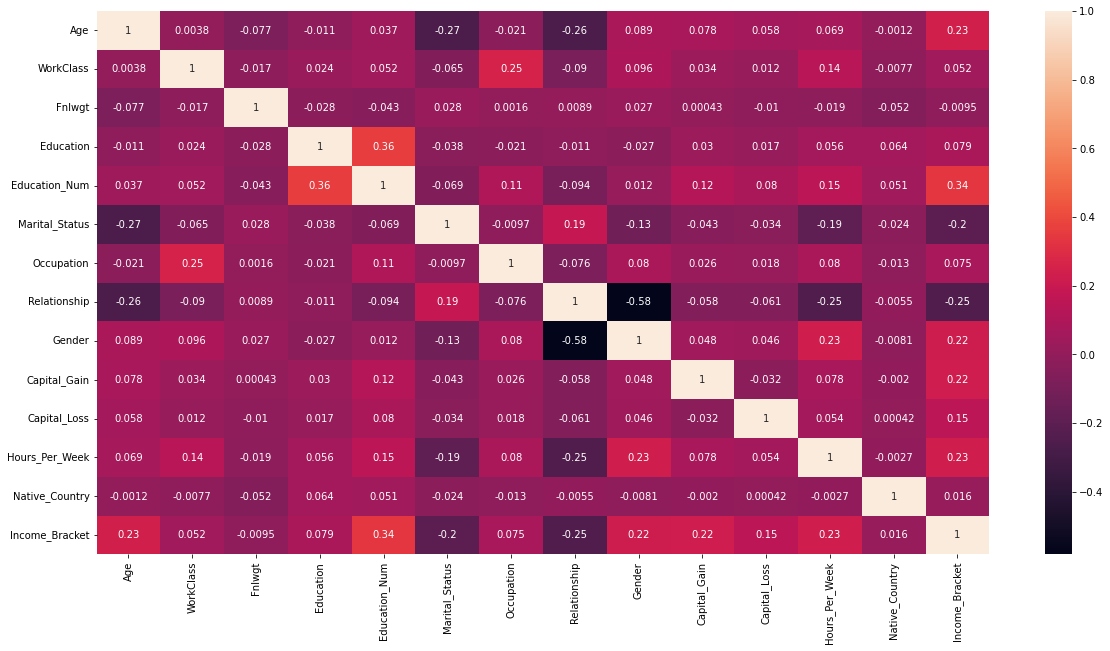

In [21]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot = True)

In [15]:
df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns = df.columns)
df

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,0.021740,0.0,0.397959,0.951220,0.0
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,0.000000,0.0,0.122449,0.951220,0.0
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,0.000000,0.0,0.397959,0.951220,0.0
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,1.0,0.000000,0.0,0.397959,0.951220,0.0
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.0,0.000000,0.0,0.397959,0.121951,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.500,0.166404,0.466667,0.733333,0.333333,0.928571,1.0,0.0,0.000000,0.0,0.377551,0.951220,0.0
32557,0.315068,0.500,0.096500,0.733333,0.533333,0.333333,0.500000,0.0,1.0,0.000000,0.0,0.397959,0.951220,1.0
32558,0.561644,0.500,0.094827,0.733333,0.533333,1.000000,0.071429,0.8,0.0,0.000000,0.0,0.397959,0.951220,0.0
32559,0.068493,0.500,0.128499,0.733333,0.533333,0.666667,0.071429,0.6,1.0,0.000000,0.0,0.193878,0.951220,0.0


In [31]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

train_num = int(len(df)*0.8)

xtrain = x.iloc[:train_num,:]
xtest = x.iloc[train_num : ,:]
ytrain = y.iloc[:train_num]
ytest = y.iloc[train_num:]

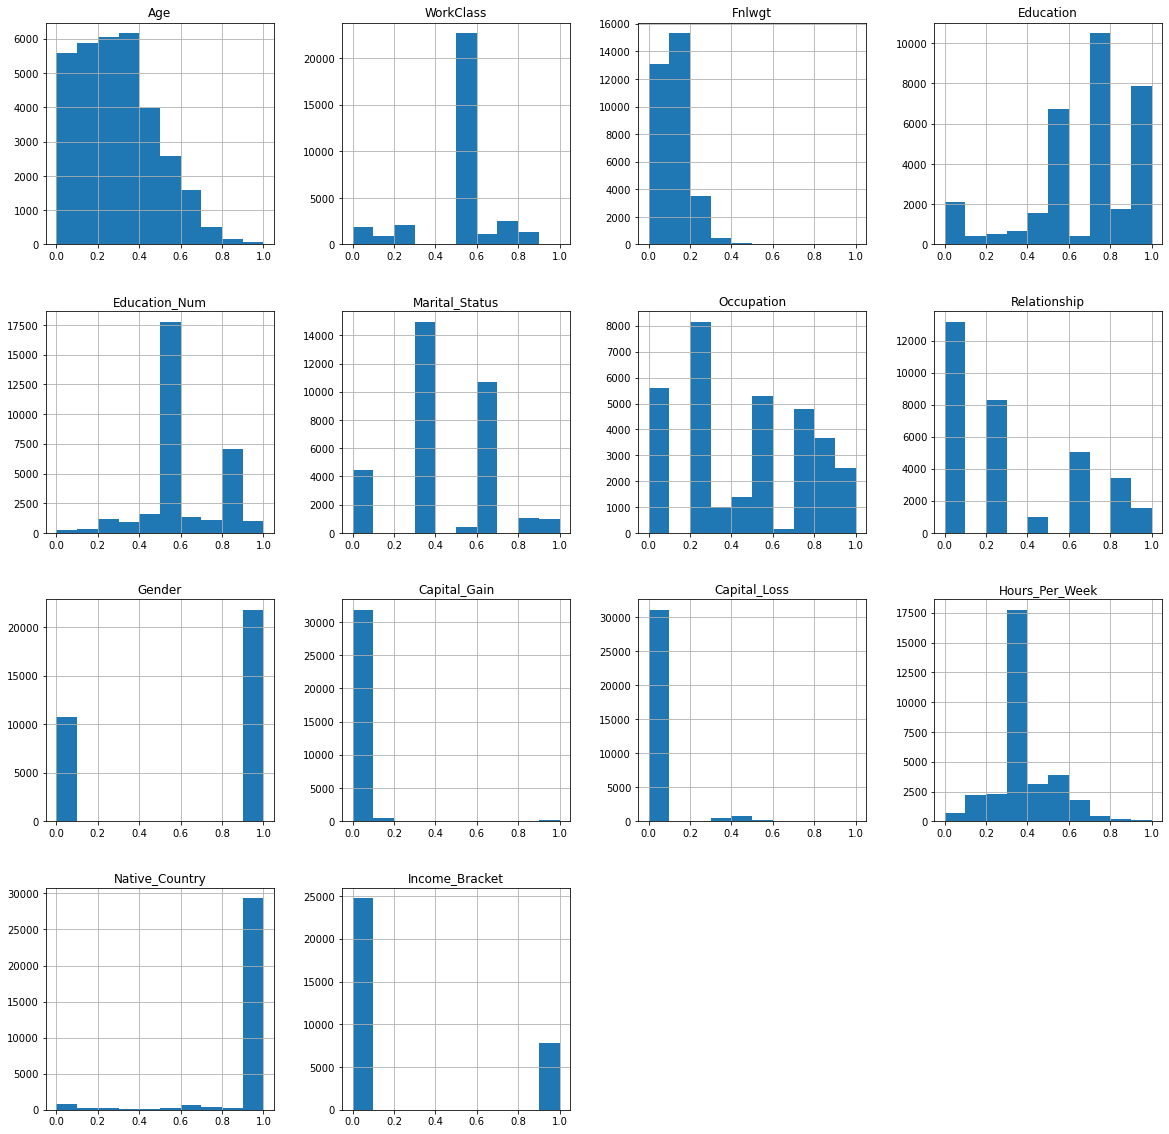

In [32]:
df.hist(figsize=(20,20));

In [34]:
# task 3

error = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(xtrain , ytrain)
    ypred = knn.predict(xtest)
    error.append(np.mean(ypred != ytest))

Minimum Error rate 0.1604483341010287 for k = 22


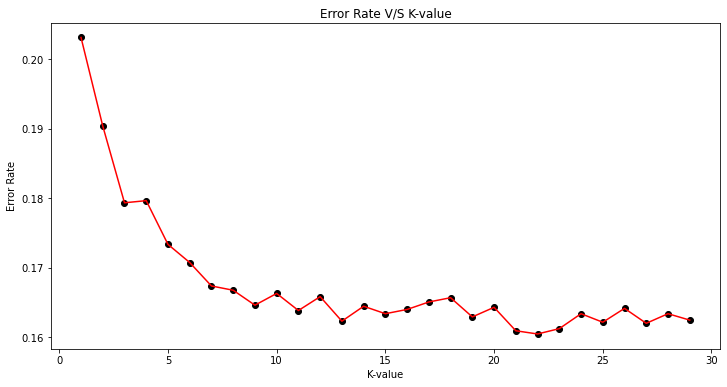

In [36]:
plt.figure(figsize = (12,6))
plt.plot(range(1,30),error , color = 'red', linestyle='-')
plt.scatter(range(1,30),error ,color = 'black')
plt.title('Error Rate V/S K-value')
plt.xlabel('K-value')
plt.ylabel('Error Rate');
print(f'Minimum Error rate {min(error)} for k = {error.index(min(error)) + 1}')

In [37]:
knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
ypred

array([0., 0., 0., ..., 0., 0., 1.])

In [39]:
# task 4

scor = knn.score(xtest, ytest)
print(f'{round(scor*100, 2)}%')

83.88%


In [44]:
confusion_matrix(ytest, ypred)

array([[4517,  396],
       [ 654,  946]], dtype=int64)

In [42]:
print(f"""
Accuracy :{accuracy_score(ytest, ypred)}
Precision :{precision_score(ytest, ypred, average='weighted')}
Recall :{recall_score(ytest, ypred, average='weighted')}
F1-Score :{f1_score(ytest, ypred, average='weighted')}""")


Accuracy :0.8387839705204975
Precision :0.8321049119369986
Recall :0.8387839705204975
F1-Score :0.8337773777067949
